In [27]:
#Core
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt

# Balancing
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Metrics
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

In [2]:
df=pd.read_csv('C:\\Users\Renato\OneDrive\Projeto_TERA\Predição Acidentes Motocicleta\Projeto-TERA-Data-Science---Acidentes-Motocicletas\CSVs\df_acidentes_sp_moto_CLEAN.csv',sep=',')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53235 entries, 0 to 53234
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ano                   53235 non-null  int64  
 1   Mes                   53235 non-null  int64  
 2   Dia                   53235 non-null  int64  
 3   Dia da Semana         53235 non-null  object 
 4   Turno                 53235 non-null  object 
 5   Município             53235 non-null  object 
 6   Jurisdição            53235 non-null  object 
 7   Administração         53235 non-null  object 
 8   Conservação           53235 non-null  object 
 9   Latitude              53235 non-null  float64
 10  Longitude             53235 non-null  float64
 11  Condições Climáticas  53235 non-null  object 
 12  Iluminação            53235 non-null  object 
 13  Mão de direção        53235 non-null  object 
 14  Relevo                53235 non-null  object 
 15  Superfície da via  

In [4]:
df.columns

Index(['Ano', 'Mes', 'Dia', 'Dia da Semana', 'Turno', 'Município',
       'Jurisdição', 'Administração', 'Conservação', 'Latitude', 'Longitude',
       'Condições Climáticas', 'Iluminação', 'Mão de direção', 'Relevo',
       'Superfície da via', 'Tipo de pavimento', 'Tipo de pista', 'Traçado',
       'Tipo de Via', 'Acidente Fatal', 'Mes_sin', 'Mes_cos',
       'dias_semana_num', 'dias_semana_norm', 'dias_semana_sin',
       'dias_semana_cos', 'Hora', 'Minuto', 'horario_float', 'horario_sin',
       'horario_cos'],
      dtype='object')

In [5]:
# escolhendo colunas
df1 = df[['Acidente Fatal','Ano','Turno','Município','Jurisdição','Administração','Conservação',
    'Latitude', 'Longitude','Condições Climáticas', 'Iluminação', 'Mão de direção', 
    'Relevo','Superfície da via', 'Tipo de pavimento', 'Tipo de pista', 'Traçado',
    'Tipo de Via','Mes_sin', 'Mes_cos','dias_semana_sin','dias_semana_cos',
    'horario_sin','horario_cos']]

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53235 entries, 0 to 53234
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Acidente Fatal        53235 non-null  int64  
 1   Ano                   53235 non-null  int64  
 2   Turno                 53235 non-null  object 
 3   Município             53235 non-null  object 
 4   Jurisdição            53235 non-null  object 
 5   Administração         53235 non-null  object 
 6   Conservação           53235 non-null  object 
 7   Latitude              53235 non-null  float64
 8   Longitude             53235 non-null  float64
 9   Condições Climáticas  53235 non-null  object 
 10  Iluminação            53235 non-null  object 
 11  Mão de direção        53235 non-null  object 
 12  Relevo                53235 non-null  object 
 13  Superfície da via     53235 non-null  object 
 14  Tipo de pavimento     53235 non-null  object 
 15  Tipo de pista      

In [7]:
#dividindo as categoris
target = 'Acidente Fatal',

cat_features = [
    'Turno','Município','Jurisdição','Administração','Conservação',
    'Condições Climáticas', 'Iluminação', 'Mão de direção', 
    'Relevo','Superfície da via', 'Tipo de pavimento', 'Tipo de pista', 'Traçado',
    'Tipo de Via'
]

num_features = ['Ano','Latitude', 'Longitude','Mes_sin', 'Mes_cos','dias_semana_sin','dias_semana_cos','horario_sin','horario_cos'
]

### Pre-processamento

In [8]:
df_proc = pd.get_dummies(df1,columns=cat_features)
df_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53235 entries, 0 to 53234
Columns: 112 entries, Acidente Fatal to Tipo de Via_Vias Municipais
dtypes: float64(8), int64(2), uint8(102)
memory usage: 9.2 MB


In [9]:
proporcao = df1['Acidente Fatal'].value_counts()[1]/(len(df1))
print('Proporção de fatais:', round(proporcao,2)*100, '%')

Proporção de fatais: 8.0 %


### Splitando os dados
-Definir melhor % de treino e teste

-Fazer por validação cruzada?

-entender melhor o stratify...é pra tudo ou só pra variavel target?

In [10]:
#features
X = df_proc.drop('Acidente Fatal',axis=1)
#target variable
y = df_proc['Acidente Fatal']
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

### Balanceamento

-Usando Random Oversampling

-Usando Ramdom Undersampling

-Usando SMOTE (Synthetic Minority OverSampling Technique)

Comparar os tipos de balanceamento usando RegLog ou Random forest?

In [11]:
### Balanceamento usando Randon Oversample
randOverSampler = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = randOverSampler.fit_resample(X_train, y_train)
#confirmando valores
y_train_ros.value_counts()


0    32894
1    32894
Name: Acidente Fatal, dtype: int64

In [12]:
### Balanceamento usando Randon Undersample
randUnderSampler = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = randUnderSampler.fit_resample(X_train, y_train)
#confirmando valores
y_train_rus.value_counts()

0    2773
1    2773
Name: Acidente Fatal, dtype: int64

In [20]:
### Balanceamento usando SMOTE (NÃO ESTÁ RODANDO, ENTENDER PORQUE)
smote = SMOTE(sampling_strategy=0.2) #testar com proporções diferentes?
X_train_smt, y_train_smt = smote.fit_resample(X_train, y_train)
#confirmando valores
y_train_smt.value_counts()

0    32894
1     6578
Name: Acidente Fatal, dtype: int64

In [21]:
y_train.value_counts()

0    32894
1     2773
Name: Acidente Fatal, dtype: int64

### Comparando balanceamentos usando Reg Log

In [24]:
#train
model_ros = LogisticRegression(max_iter=2000,random_state=42) #definindo o classificador
mdl_ros = model_ros.fit(X_train_ros,y_train_ros)#treinando o modelo

model_rus = LogisticRegression(max_iter=2000,random_state=42) #definindo o classificador
mdl_rus = model_rus.fit(X_train_rus,y_train_rus)#treinando o modelo

model_smt = LogisticRegression(max_iter=2000,random_state=42) #definindo o classificador
mdl_smt = model_smt.fit(X_train_smt,y_train_smt)#treinando o modelo

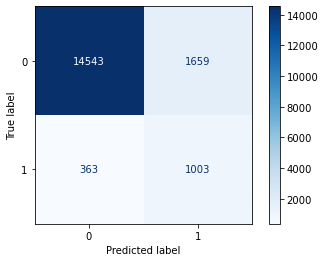

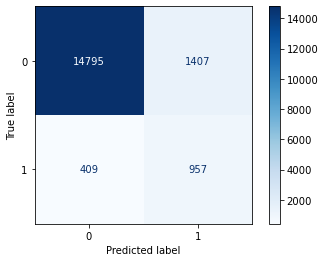

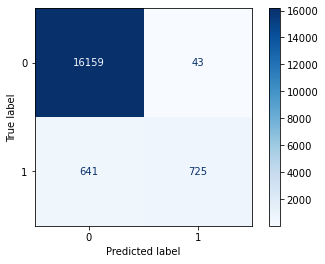

In [32]:
plot_confusion_matrix(model_ros, X_test, y_test, cmap='Blues')
plot_confusion_matrix(model_rus, X_test, y_test, cmap='Blues')
plot_confusion_matrix(model_smt, X_test, y_test, cmap='Blues')

In [ ]:
# plotar métricas e escolher um metodo de balanceamento....fazer tmb por ramdom forest